# <font color='#eb3483'> Introduction to Pandas </font>

Pandas is numpy's extension for Data Analysis. Generally speaking, pandas provides the data structure `DataFrame`. A `pandas.Dataframe` is basically a table similar to a excel spreadsheet, that has columns and rows.   

http://pandas.pydata.org/

The standard way of importing pandas is:

##  <font color='#eb3483'> 0. Import Packages </font>

In [5]:
import pandas as pd

In this notebook we will cover:
<font color='#eb3483'>
1. Dataframes
1. Reading and writing a data frame
1. Inspecting a data frame
1. Indexing 

    </font>


##  <font color='#eb3483'> 1. Building DataFrames </font>

There are many ways to create a dataframe

In [3]:
#We can feed in a 2D list and specify column names - and make the data frame with the function DataFrame()
rick_morty = pd.DataFrame(
    [
        ["Rick", "Sanchez", 60],
        ["Morty", "Smith", 14]
    ], columns = ["first_name", "last_name", "age"]
)
rick_morty

,first_name,last_name,age
0,Rick,Sanchez,60
1,Morty,Smith,14


In [4]:
type(rick_morty)

pandas.core.frame.DataFrame

In [12]:
#We can take a peak of our dataframe using the built-in head method .head()

#^^^

rick_morty.head()

,first_name,last_name,age
0,Rick,Sanchez,60
1,Morty,Smith,14


We can create an empty dataframe

In [32]:
df3 = pd.DataFrame()

In [33]:
#It's as you would expect ... empty
df3

""


Now lets add columns to the empty dataframe

In [34]:
df3['teaching_team'] = ["Taryn", "Enock", "David", "Julie"]

In [35]:
df3

,teaching_team
0,Taryn
1,Enock
2,David
3,Julie


In [36]:
#guess our age (guess carefully...)
#assign it to column 'age' in df3

df3['age'] = [40, 26, 27, 23]

In [37]:
df3

,teaching_team,age
0,Taryn,40
1,Enock,26
2,David,27
3,Julie,23


We can see the column names with `.columns`

In [38]:
df3.columns

Index(['teaching_team', 'age'], dtype='object')

We can see the values of a column

In [39]:
df3['teaching_team']

0    Taryn
1    Enock
2    David
3    Julie
Name: teaching_team, dtype: object

We can also sort our dataframe by our columns

How do we get help ... lets try a few things

In [40]:
#Let's get some help
df3.sort_values?

In [43]:
#Let's sort by name
df3.sort_values(by="teaching_team")

,teaching_team,age
3,Julie,23
1,Enock,26
2,David,27
0,Taryn,40


In [46]:
#Try and sort by age 
df3.sort_values(by="age")

#How can we change this to descending?
df3.sort_values(by="age", ascending = True)

,teaching_team,age
3,Julie,23
1,Enock,26
2,David,27
0,Taryn,40


Selecting a column that does not exists will raise a `KeyError` (same error as when selecting a missing key in a dictionary)

In [49]:
# df3["address"]

## <font color='#eb3483'> 2. Reading/Writing data with dataframes </font>

It's not very often we have to create our own data frame but now we know just incase.   
Pandas can import from and export to many types of files, csv, json, excel among others.

For example, we can read a csv including information about the Avengers (taken from [here](https://github.com/fivethirtyeight/data/tree/master/avengers))

In [6]:
avengers = pd.read_csv("data/avengers.csv")

In [7]:
# look at the head of our data set
avengers.head()


,URL,name,appearances,current,gender,starting_date,notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,1963,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,1963,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,1963,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,1963,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,1963,Dies in Fear Itself brought back because that'...


We can save the dataframe back to a csv file with `to_csv` (this method writes the index by default as a separate column, we can avoid this by passing the argument `index=False`).

In [9]:
avengers.to_csv("avengers2.csv")

or we can export to excel using `to_excel` (it requires a separate package, `xlwt`)

In [55]:
# avengers.to_excel("avengers.xls")

Likewise we can read from a excel file easily (this requires the package `xlrd`)

In [57]:
# avengers_reloaded = pd.read_excel("avengers.xls")

In [59]:
# avengers_reloaded.head()

In [62]:
avengers.to_excel('avengers.xlsx', engine='xlsxwriter')

Bothered by that extra 'Unnamed:0' column? It's the index column, which was created when you read in the data the first time. To avoid saving this column, use `index=False` when saving: `avengers.to_csv("avengers2.csv", index=False)`.

## <font color='#eb3483'> 3. Inspecting a dataframe </font>

Once we read in a data frame - we generally have a quick look around (just as you would do in excel).
 



We can see the first rows of a dataframe with `head()`

In [63]:
avengers.head()

,URL,name,appearances,current,gender,starting_date,notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,1963,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,1963,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,1963,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,1963,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,1963,Dies in Fear Itself brought back because that'...


and the last ones with tail()

In [64]:
avengers.tail()

,URL,name,appearances,current,gender,starting_date,notes
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,2013,NaN
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,2014,NaN
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,2014,NaN
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,2014,NaN
172,http://marvel.wikia.com/Kaluu_(Earth-616)#,Kaluu,35,YES,MALE,2015,NaN


We can see the size of a dataframe (n_rows, n_columns) with `shape`

In [65]:
avengers.shape

(173, 7)

We can see the data type of each column with `dtypes`

In [66]:
avengers.dtypes

URL              object
name             object
appearances       int64
current          object
gender           object
starting_date     int64
notes            object
dtype: object

We can look at the column names using `.columns`

In [67]:
avengers.columns

Index(['URL', 'name', 'appearances', 'current', 'gender', 'starting_date',
       'notes'],
      dtype='object')

We can use `.describe()` to find statistical information about the dataframe's columns.

In [69]:
avengers.describe()

,appearances,starting_date
count,173.000000,173.000000
mean,414.052023,1988.445087
std,677.991950,30.374669
min,2.000000,1900.000000
25%,58.000000,1979.000000
50%,132.000000,1996.000000
75%,491.000000,2010.000000
max,4333.000000,2015.000000


<hr>

## <font color='#eb3483'> 4. Appending Dataframes </font>

We may have data sets that we want to add together by rows   
e.g. batches of data by month, or different countries etc.

<div>
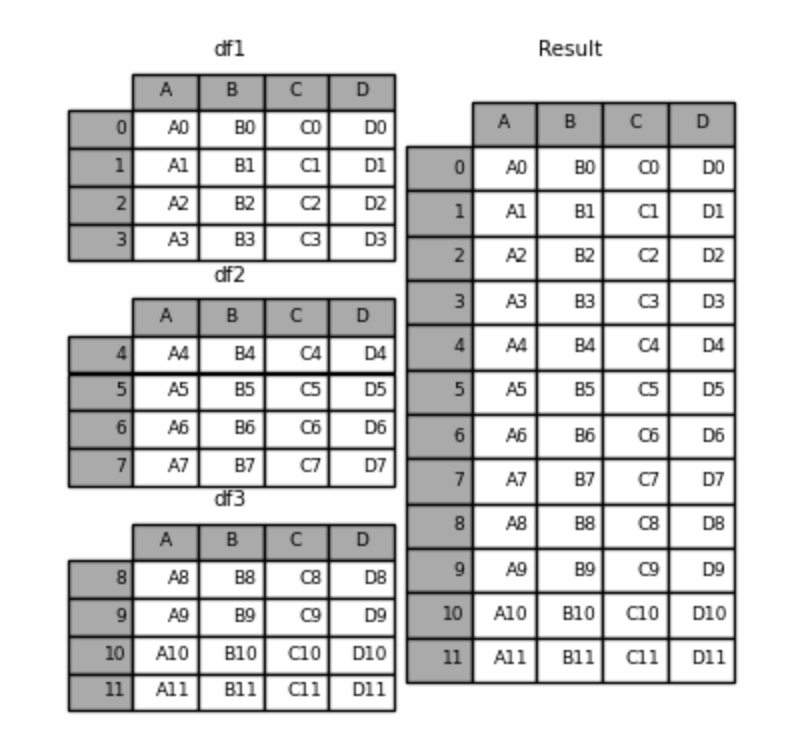
</div>

For this there are two ways:   
Concatenate (default axis = 0 for row concatenation): `pd.concat([df1, df2])`   
OR   
append: you can simply call `df1.append(df2)`

In [ ]:
#Excercise - read in csv of listings_ireland.csv and listings_scotland.csv airbnb listings and check shape

In [80]:
ireland = pd.read_csv('data\listings_ireland.csv')
ireland.shape

(12, 18)

In [79]:
scotland = pd.read_csv('data\listings_scotland.csv')
scotland.shape

(10, 18)

In [ ]:
#join the two data frames together using concat and check shape

In [81]:
joined = pd.concat([ireland, scotland])
joined.shape

(22, 18)

In [ ]:
#join the two data frames together using append and check the shape

In [84]:
joined2 = ireland.append(scotland)
joined2.shape

C:\Users\phuro\AppData\Local\Temp\ipykernel_24528\4171423410.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined2 = ireland.append(scotland)


(22, 18)

<hr>

## <font color='#eb3483'> 5. Merging Data frames </font>

Very often we may have a few different data sets related to the same topic that we want to combine.   

To be able to combine these. They must have a column in common (note sometimes the data is common but the column name has been erroneously mislabelled and you would need to correct it before merging).

*An example is maybe your college has a data set of class attandance per student and a data set of their grades.   
They want to see if class attendance is correlated to your grade.
They would need to join the two data sets together using the student name (or more often a student ID).*


<div>
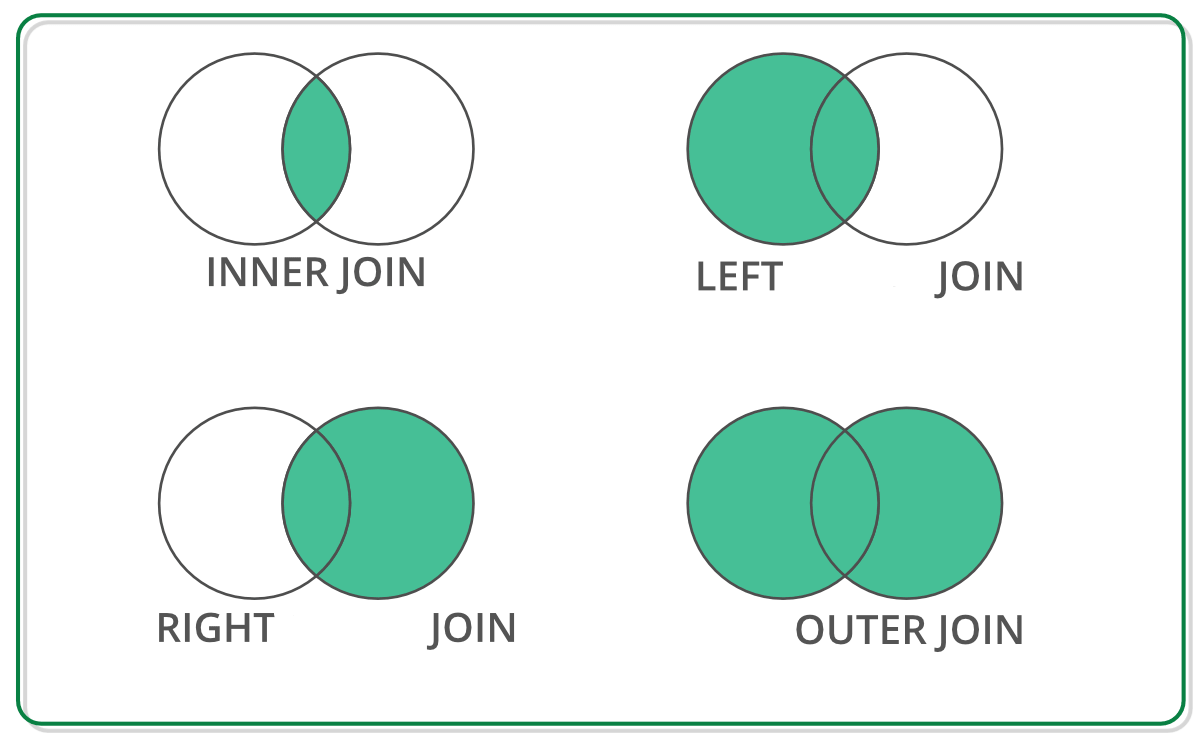
</div>

`merge()`: To combine the datasets on common column or index or both.   
`concat()`: To combine the datasets across rows or columns.   
`join()`: To combine the datasets on key column or index.

In [91]:
#Excercise - read in ny_airbnb_listing_info.csv and check shape
ny_listings = avengers = pd.read_csv("data/ny_airbnb_listing_info.csv")
print(ny_listings.shape)
ny_listings.head()

(10, 7)


,id,room_type,accommodates,bedrooms,beds,price,review_scores
0,2595,Entire home/apt,2,NaN,1,150,4.70
1,3831,Entire home/apt,3,1.0,3,79,4.46
2,5121,Private room,2,1.0,1,60,4.52
3,5136,Entire home/apt,4,2.0,2,175,5.00
4,5178,Private room,2,1.0,1,61,4.19


In [92]:
#Excercise - read in ny_airbnb_location.csv and check shape
ny_locations = pd.read_csv("data/ny_airbnb_location.csv")
print(ny_locations.shape)
ny_locations.head()

(10, 5)


,id,neighbourhood_group,neighbourhood,latitude,longitude
0,2595,Manhattan,Midtown,40.75356,-73.98559
1,3831,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765
2,5121,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512
3,5136,Brooklyn,Sunset Park,40.66265,-73.99454
4,5178,Manhattan,Midtown,40.76457,-73.98317


In [94]:
# Step 1: lets join the listings and location together to get a complete set of listings data
all_listings = pd.merge(ny_listings, ny_locations, on = "id", how='left')

In [95]:
print(all_listings.shape)
all_listings.head(11)

(10, 11)


,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude
0,2595,Entire home/apt,2,NaN,1,150,4.70,Manhattan,Midtown,40.75356,-73.98559
1,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765
2,5121,Private room,2,1.0,1,60,4.52,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512
3,5136,Entire home/apt,4,2.0,2,175,5.00,Brooklyn,Sunset Park,40.66265,-73.99454
4,5178,Private room,2,1.0,1,61,4.19,Manhattan,Midtown,40.76457,-73.98317
5,5203,Private room,1,1.0,1,75,4.91,Manhattan,Upper West Side,40.80380,-73.96751
6,5803,Private room,2,1.0,0,98,4.71,Brooklyn,South Slope,40.66801,-73.98784
7,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342
8,6872,Private room,1,1.0,1,65,NaN,Manhattan,East Harlem,40.80107,-73.94255
9,6990,Private room,1,1.0,1,62,4.88,Manhattan,East Harlem,40.78778,-73.94759


In [96]:
#since we only have 10 items and they are the exact same between coloumns it wouldnt matter if we joined
#by left, right, inner, or outer. But in some instances you would need to decide
#which is appropriate depending on what you are trying to achieve
#tip - always check its done what you want it to do!


In [97]:
#Excercise - read in ny_airbnb_reviews.csv and check shape
ny_reviews = pd.read_csv("data/ny_airbnb_reviews.csv")
print(ny_reviews.shape)
ny_reviews.head()

(811, 3)


,id,comment_id,comments
0,3831,588410318,We had a nice stay with Lisa in Brooklyn. Espe...
1,3831,589143289,The location it’s fantastic. Even it’s an enti...
2,3831,597434314,Lisa Roxanne was a great host and very accomod...
3,3831,598086924,DO NOT stay here if your expecting anything l...
4,3831,601064768,LisaRoxanne's place is conveniently located cl...


In [105]:
all_listings
# ny_reviews

,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude
0,2595,Entire home/apt,2,NaN,1,150,4.70,Manhattan,Midtown,40.75356,-73.98559
1,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765
2,5121,Private room,2,1.0,1,60,4.52,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512
3,5136,Entire home/apt,4,2.0,2,175,5.00,Brooklyn,Sunset Park,40.66265,-73.99454
4,5178,Private room,2,1.0,1,61,4.19,Manhattan,Midtown,40.76457,-73.98317
5,5203,Private room,1,1.0,1,75,4.91,Manhattan,Upper West Side,40.80380,-73.96751
6,5803,Private room,2,1.0,0,98,4.71,Brooklyn,South Slope,40.66801,-73.98784
7,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342
8,6872,Private room,1,1.0,1,65,NaN,Manhattan,East Harlem,40.80107,-73.94255
9,6990,Private room,1,1.0,1,62,4.88,Manhattan,East Harlem,40.78778,-73.94759


In [106]:
#Let's get reviews for the 10 listings we have. 
pd.merge(all_listings, ny_reviews, on="id", how='left')

,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude,comment_id,comments
0,2595,Entire home/apt,2,NaN,1,150,4.70,Manhattan,Midtown,40.75356,-73.98559,NaN,NaN
1,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,588410318.0,We had a nice stay with Lisa in Brooklyn. Espe...
2,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,589143289.0,The location it’s fantastic. Even it’s an enti...
3,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,597434314.0,Lisa Roxanne was a great host and very accomod...
4,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,598086924.0,DO NOT stay here if your expecting anything l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,615261296.0,Allen & Irina are great hosts. My partner and ...
123,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,616364517.0,Allen and Irina's studio is quite lovely! Very...
124,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,619071518.0,"There are a lot of noise, not only from the ne..."
125,6872,Private room,1,1.0,1,65,NaN,Manhattan,East Harlem,40.80107,-73.94255,NaN,NaN


In [108]:
#exercise - try and merge on right, inner, outer - see how it differs.

pd.merge(all_listings, ny_reviews, on="id", how='right')

,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude,comment_id,comments
0,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,588410318,We had a nice stay with Lisa in Brooklyn. Espe...
1,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,589143289,The location it’s fantastic. Even it’s an enti...
2,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,597434314,Lisa Roxanne was a great host and very accomod...
3,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,598086924,DO NOT stay here if your expecting anything l...
4,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,601064768,LisaRoxanne's place is conveniently located cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732893784,Jana's place is perfect for a weekend getaway ...
807,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734506878,I stayed as a local staycation birthday getawa...
808,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735917806,A well appointed kitchen and bathroom. In sum...
809,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736741587,Our stay at Jana's was great! The space is exa...


In [109]:
pd.merge(all_listings, ny_reviews, on="id", how='inner')

,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude,comment_id,comments
0,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,588410318,We had a nice stay with Lisa in Brooklyn. Espe...
1,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,589143289,The location it’s fantastic. Even it’s an enti...
2,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,597434314,Lisa Roxanne was a great host and very accomod...
3,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,598086924,DO NOT stay here if your expecting anything l...
4,3831,Entire home/apt,3,1.0,3,79,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,601064768,LisaRoxanne's place is conveniently located cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,612029321,Good apartment!!
117,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,613247747,Irina was a gracious host. The apartment is la...
118,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,615261296,Allen & Irina are great hosts. My partner and ...
119,6848,Entire home/apt,3,NaN,1,89,4.56,Brooklyn,Williamsburg,40.70935,-73.95342,616364517,Allen and Irina's studio is quite lovely! Very...


In [110]:
pd.merge(all_listings, ny_reviews, on="id", how='outer')

,id,room_type,accommodates,bedrooms,beds,price,review_scores,neighbourhood_group,neighbourhood,latitude,longitude,comment_id,comments
0,2595,Entire home/apt,2.0,NaN,1.0,150.0,4.70,Manhattan,Midtown,40.75356,-73.98559,NaN,NaN
1,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,588410318.0,We had a nice stay with Lisa in Brooklyn. Espe...
2,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,589143289.0,The location it’s fantastic. Even it’s an enti...
3,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,597434314.0,Lisa Roxanne was a great host and very accomod...
4,3831,Entire home/apt,3.0,1.0,3.0,79.0,4.46,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,598086924.0,DO NOT stay here if your expecting anything l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732893784.0,Jana's place is perfect for a weekend getaway ...
813,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734506878.0,I stayed as a local staycation birthday getawa...
814,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735917806.0,A well appointed kitchen and bathroom. In sum...
815,66974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736741587.0,Our stay at Jana's was great! The space is exa...


Read [this](https://towardsdatascience.com/python-pandas-tricks-3-best-methods-4a909843f5bc) helpful article on the difference between left, right, inner and outer joining with an example. 